### Polynomial regression


In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [ ]:
x = np.arange(20, dtype=np.longdouble)
y = np.cos(x / 2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]


[[-1.65 -1.09 -0.86 -0.74 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-1.47 -1.08 -0.86 -0.74 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-1.3  -1.05 -0.86 -0.74 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-1.13 -1.01 -0.85 -0.74 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.96 -0.95 -0.83 -0.73 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.78 -0.87 -0.8  -0.72 -0.65 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.61 -0.77 -0.76 -0.7  -0.64 -0.59 -0.55 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.43 -0.66 -0.7  -0.67 -0.63 -0.58 -0.54 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.26 -0.52 -0.62 -0.63 -0.61 -0.57 -0.54 -0.51 -0.48 -0.46 -0.44 -0.42
  -0.4 ]
 [-0.09 -0.37 -0.52 -0.57 -0.57 -0.55 -0.53 -0.5  -0.48 -0.45 -0.44 -0.42
  -0.4 ]
 [ 0.09 -0.21 -0.39 -0.48 -0.51 -0.52 -0.51 -0.49 -0.47 -0.45 -0.43 -0.42
  -0.4 ]
 [ 0.26 -0.02 -0.23 -0.35 -0.42 -0.46 -0.47 -0.46 -0.45 -0.44 -0.43 -0.41
  -0.4 ]
 [ 0

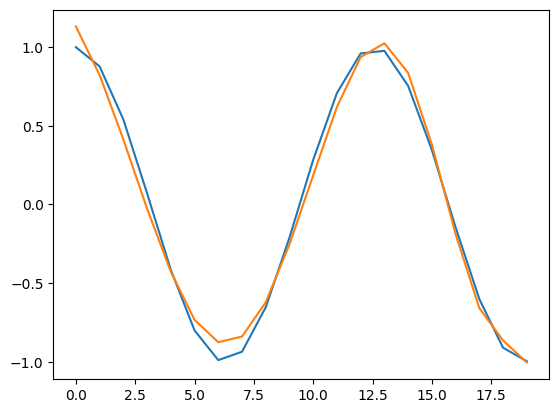

In [12]:
def normalize_z_score(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    return (X - mean) / std, mean, std


def calc_cost(x_train, y_train, w, b) -> float:
    m: int = len(x_train)
    f_wb = x_train @ w + b
    cost: float = (1 / (2 * m)) * np.sum((f_wb - y_train) ** 2)

    return cost


def find_gradient(x_train, y_train, w, b):
    m: int = len(x_train)

    pred = (x_train @ w) + b
    e = pred - y_train

    diff_w = (1 / m) * (x_train.T @ e)
    diff_b = (1 / m) * np.sum(e)

    return diff_w, diff_b


def gradient_descent(x_train, y_train, iterations: int, learning_rate: float):
    m: int = len(x_train)
    n: int = len(x_train[0])

    w = np.zeros(n, dtype=np.longdouble)
    b: float = 0

    for _ in range(iterations):
        diff_w, diff_b = find_gradient(x_train, y_train, w, b)
        w -= learning_rate * diff_w
        b -= learning_rate * diff_b

    return w, b


def predict(data, w, b):
    return (data @ w) + b


def test(x_train, y_train):
    m: int = len(x_train)
    pred = np.zeros(m, dtype=np.longdouble)
    iterations: int = 1000000
    learning_rate: float = 1e-1

    w, b= gradient_descent(x_train, y_train, iterations, learning_rate)

    for i in range(m):
        pred[i] = predict(x_train[i], w, b)

    print(w, b)

    print(y_train)
    print(pred)

    cost = calc_cost(x_train, y_train, w, b)
    print(cost)
    
    plt.plot(np.arange(m), y_train)
    plt.plot(np.arange(m), pred)

X, mean, std = normalize_z_score(X)
test(X, y)